# Final Project Checkpoint 2
Eric Hay, Eyal Arkin, Joseph Ettinger


Checkpoint 2 (25 points)
Submit a jupyter notebook file (.ipynb) on Gradescope with:

- (5 points) Data preprocessing: (a) import, (b) parse (e.g., convert strings to ints), (c)
organize (e.g., set up a database or a pandas DataFrame).

- (20 points) Basic data exploration and summary statistics

    - You must present three conclusions using at least three different statistical methods including hypothesis testing.

    - For example: What are the main characteristics of your dataset? How many features and entries are there? Is a feature over-represented Are features correlated? Are there outliers? Identify the attributes that will affect your choice of primary analysis technique. Etcetera.


- For each method, you must have at least one gorgeous plot


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats # same as from scipy import stats

df = pd.read_csv('mxmh_survey_results.csv')
# Converting the Date to a datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# converting Age to an int type
df['Age'] = df['Age'].fillna(0).astype(int)
df['Music effects'] = df['Music effects'].fillna('No Effect') # The ASSUMPTION is no effect if it is an NaN value 
# Eliminate entries where Hours per Day >= 20 as we assume these are unreliable/fake entries
df = df[df['Hours per day'] < 20]
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No Effect,I understand.
1,2022-08-27 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No Effect,I understand.
2,2022-08-27 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2022-10-30 14:37:28,17,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,2022-11-01 22:26:42,18,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,2022-11-03 23:24:38,19,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,2022-11-04 17:31:47,19,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


### Conclusion 1

We looked into the correlation between Hours per Day listening to music and reported level of Depression. We determined the correlation between those two sets of data and concluded there was a negligible positive correlation between the two, as demonstrated by the correlation coefficient being positive and relatively close to 0. This is slightly unexpected, as the logical assumption would be that there would be a slight negative correlation between hours of music listened to per day and poor mental health. Clearly, we were mistaken.

Correlation Coefficient = ~0.14


The correlation coefficient between the "Hours per day" and "Depression" is: 0.14093364959351967


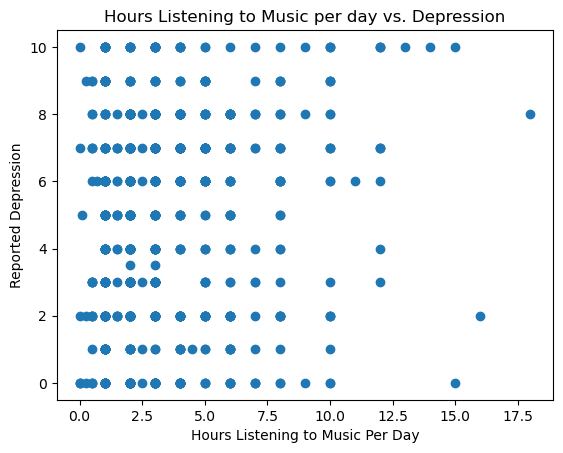

In [131]:

# Correlation coefficient to see how hours listening to music per day and depression may be linked
correlation = df['Hours per day'].corr(df['Depression'])
print(f'The correlation coefficient between the "Hours per day" and "Depression" is: {correlation}')

plt.scatter(df['Hours per day'], df['Depression'])
plt.xlabel("Hours Listening to Music Per Day")
plt.ylabel("Reported Depression")
plt.title("Hours Listening to Music per day vs. Depression")
plt.show()


### Conclusion 2

Here, we ran a hypothesis test on the data.

**Null Hypothesis**: There is no correlation between genre of music and effect on listener's mental health.

**Alternate Hypothesis**: There is a correlation between genre of music and its effect on the listener's mental health.

After creating a contingency table and running a Chi<sup>2</sup> Test, we determined that the p value of such a test was ~6.476e<sup>-6</sup> which is approximately 0.01. As a result of such a low p-value, it is fair to reject the null hypothesis and conclude that there is some correlation between genre of music and effect on listener's mental health. Below, we have displayed a graph showing the respondent's selected genre of music on the x-axis, with the y-axis representing the count of respondents who replied either `Improve`, `No effect`, or `Worsen`


P Value of Chi2 Test: 6.476027692181354e-06


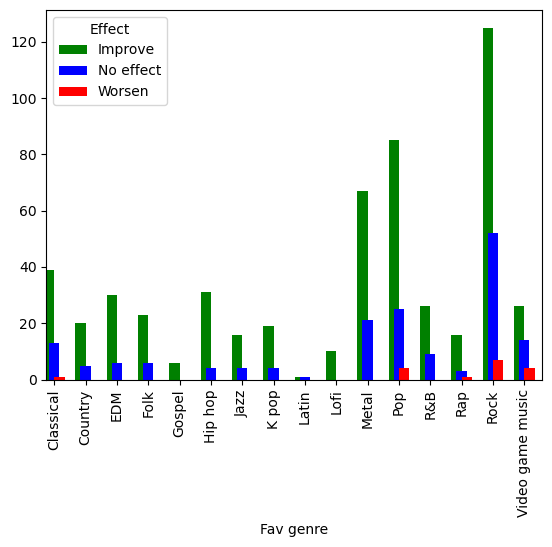

In [132]:
cont_table = pd.crosstab(df['Fav genre'], df['Music effects'])

chi2, p, dof, expected = stats.chi2_contingency(cont_table)
print(f'P Value of Chi2 Test: {p}')

cont_table['Improve'].plot(kind='bar', color='green', position=1, width=0.33, label='Improve')
cont_table['No effect'].plot(kind='bar', color='blue', position=0.5, width=0.33, label='No effect')
cont_table['Worsen'].plot(kind='bar', color='red', position=0, width=0.33, label='Worsen')
plt.legend(title='Effect', labels=['Improve', 'No effect', 'Worsen'])

plt.show()

### Conclusion 3

For this part of our exploration we will be pursuing an interest in the relationship between THE EFFECT THAT MUSIC HAS ONE'S MENTAL HEALTH AND THAT INDIVIDUAL'S DEGREE OF OCD SEVERITY...This is an interesting area of exploration because OCD is a disorder that varies tremendously in terms of severity and so learning about the relationship between these different types of individuals and how they react to music is very fascinating.

**Null Hypothesis**: There is NO STATISTICALLY SIGNIFICANT RELATIONSHIP between the effect of music on one's mental health and the severity of one's OCD. 

**Alternate Hypothesis**: There is A STATISTICALLY SIGNIFCANT RELATIONSHIP between the effect of music on one's mental health and the severity of one's OCD.

We decided on an ANOVA test to determine whether or not to reject the null hypothesis with a sigificance level of 0.05

0.25010011120215336


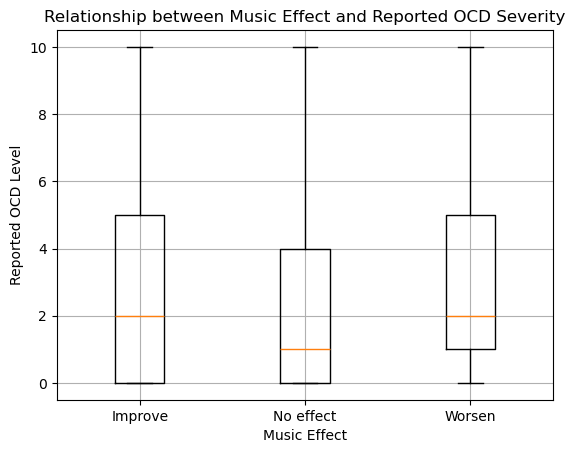

In [133]:
grouped = df.groupby('Music effects')
improve = grouped.get_group('Improve')
none = grouped.get_group('No effect')
worsen = grouped.get_group('Worsen')

result = stats.f_oneway(improve['OCD'], none['OCD'], worsen['OCD'])
print(result.pvalue)

plt.boxplot([improve['OCD'], none['OCD'], worsen['OCD']], labels=['Improve', 'No effect', 'Worsen'])
plt.xlabel('Music Effect')
plt.ylabel('Reported OCD Level')
plt.title('Relationship between Music Effect and Reported OCD Severity')
plt.grid(True)

plt.show()

Based on our P-Value, which is greater than our alpha of 0.05, we must fail to reject the null hypothesis. Thereby, we must accept that there is no statistically significant relationship between a respondent's reported effect of music on their mental health and the severity of their OCD. 